In [4]:
import pandas as pd
import numpy as np

In [5]:
# Load all datasets into dataframes
df1 = pd.read_csv("C:/Users/hp/Downloads/Life Expectancy socioeconomic.csv")
df2 = pd.read_csv("C:/Users/hp/Downloads/3- life-expectancy-at-different-ages.csv")
df3 = pd.read_csv("C:/Users/hp/Downloads/life_expectancy_female_male.csv")
df4 = pd.read_csv("C:/Users/hp/Downloads/gross_national_income_per_capital.csv")
df5 = pd.read_csv("C:/Users/hp/Downloads/human_development_index.csv")
df6 = pd.read_csv("C:/Users/hp/Downloads/co2_production.csv")

In [6]:
# Rename columns to have consistent naming conventions and avoid conflicts
df2 = df2.rename(columns={
    'Entity': 'Country',
    'Code': 'ISO_Code',
    'Period life expectancy at birth - Sex: all - Age: 0': 'Life_expectancy_at_birth',
    'Period life expectancy - Sex: all - Age: 10': 'Life_expectancy_at_age_10',
    'Period life expectancy - Sex: all - Age: 25': 'Life_expectancy_at_age_25',
    'Period life expectancy - Sex: all - Age: 45': 'Life_expectancy_at_age_45',
    'Period life expectancy - Sex: all - Age: 65': 'Life_expectancy_at_age_65',
    'Period life expectancy - Sex: all - Age: 80': 'Life_expectancy_at_age_80'
})

In [7]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# Rename 'Entity' to 'Country' in df2
df2 = df2.rename(columns={'Entity': 'Country'})


In [9]:
# Rename 'Entity' to 'Country' in df3
df3 = df3.rename(columns={'Entity': 'Country'})


In [10]:
# Rename columns to have consistent naming conventions and avoid conflicts
df2 = df2.rename(columns={
    'Entity': 'Country',
    'Code': 'ISO_Code',
    'Period life expectancy at birth - Sex: all - Age: 0': 'Life_expectancy_at_birth',
    'Period life expectancy - Sex: all - Age: 10': 'Life_expectancy_at_age_10',
    'Period life expectancy - Sex: all - Age: 25': 'Life_expectancy_at_age_25',
    'Period life expectancy - Sex: all - Age: 45': 'Life_expectancy_at_age_45',
    'Period life expectancy - Sex: all - Age: 65': 'Life_expectancy_at_age_65',
    'Period life expectancy - Sex: all - Age: 80': 'Life_expectancy_at_age_80'
})

In [11]:
df4 = df4.rename(columns={
    'ISO3': 'ISO_Code'
})


In [12]:
df5 = df5.rename(columns={
    'ISO3': 'ISO_Code'
})

In [13]:
# Filter the HDI dataset for columns from the year 2000 to 2015 and keep 'hdicode'
columns_to_keep_hdi = ['Country', 'hdicode'] + ['hdi_' + str(year) for year in range(2000, 2016)]
df5_hdi_filtered = df5[columns_to_keep_hdi]

# Display the first few rows to ensure the filtering is correct
df5_hdi_filtered.head()

,Country,hdicode,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015
0,Afghanistan,Low,0.335,0.337,0.362,0.376,0.392,0.400,0.409,0.424,0.430,0.440,0.448,0.456,0.466,0.474,0.479,0.478
1,Angola,Medium,0.375,0.386,0.403,0.420,0.433,0.447,0.459,0.475,0.486,0.500,0.510,0.526,0.541,0.552,0.563,0.582
2,Albania,High,0.677,0.684,0.689,0.696,0.700,0.711,0.718,0.730,0.736,0.741,0.754,0.766,0.778,0.785,0.792,0.795
3,Andorra,Very High,0.818,0.825,0.832,0.841,0.833,0.833,0.848,0.847,0.850,0.848,0.848,0.849,0.869,0.864,0.871,0.867
4,United Arab Emirates,Very High,0.796,0.800,0.804,0.814,0.818,0.822,0.827,0.831,0.834,0.833,0.835,0.840,0.846,0.852,0.859,0.865


In [14]:
# Melt the HDI dataset to have 'Year' and 'HDI' as separate columns
df5_hdi_melted = df5_hdi_filtered.melt(id_vars=['Country', 'hdicode'], 
                                       var_name='Year', 
                                       value_name='HDI')

# Convert 'Year' to integer
df5_hdi_melted['Year'] = df5_hdi_melted['Year'].str.extract('(\d+)').astype(int)

# Display the first few rows to ensure the melting is correct
df5_hdi_melted.head()


,Country,hdicode,Year,HDI
0,Afghanistan,Low,2000,0.335
1,Angola,Medium,2000,0.375
2,Albania,High,2000,0.677
3,Andorra,Very High,2000,0.818
4,United Arab Emirates,Very High,2000,0.796


In [15]:
# Merge the HDI data with the primary dataset
merged_with_hdi = df1.merge(df5_hdi_melted, on=['Country', 'Year'], how='left')

# Display the first few rows of the merged dataframe
merged_with_hdi.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,hdicode,HDI
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,0.478
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Low,0.479
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low,0.474
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low,0.466
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low,0.456


In [16]:
# Melt the GNI dataset to have 'Year' and 'GNI' as separate columns
columns_to_keep_gni = ['Country', 'hdicode'] + ['gnipc_' + str(year) for year in range(2000, 2016)]
df4_filtered = df4[columns_to_keep_gni]

df4_gni_melted = df4_filtered.melt(id_vars=['Country', 'hdicode'], 
                                   var_name='Year', 
                                   value_name='GNI')

# Convert 'Year' to integer
df4_gni_melted['Year'] = df4_gni_melted['Year'].str.extract('(\d+)').astype(int)

# Merge the GNI data with the primary dataset
merged_with_hdi_gni = merged_with_hdi.merge(df4_gni_melted, on=['Country', 'Year'], how='left')

# Display the first few rows of the merged dataframe
merged_with_hdi_gni.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,hdicode_x,HDI,hdicode_y,GNI
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,0.478,Low,2101.589319
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Low,0.479,Low,2178.507021
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low,0.474,Low,2193.553936
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low,0.466,Low,2125.862821
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low,0.456,Low,1999.653042


In [17]:
# Drop 'hdicode_y' and rename 'hdicode_x' to 'hdicode'
merged_with_hdi_gni = merged_with_hdi_gni.drop(columns=['hdicode_y'], errors='ignore')
merged_with_hdi_gni = merged_with_hdi_gni.rename(columns={'hdicode_x': 'hdicode'})

# Display the first few rows to ensure the changes are correct
merged_with_hdi_gni.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,hdicode,HDI,GNI
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,0.478,2101.589319
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Low,0.479,2178.507021
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low,0.474,2193.553936
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low,0.466,2125.862821
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low,0.456,1999.653042


In [18]:
# Filter df3 for the years 2000 to 2015
df3_filtered = df3[(df3['Year'] >= 2000) & (df3['Year'] <= 2015)]

# Ensure we only have countries present in the primary dataset
primary_countries = set(merged_with_hdi_gni['Country'].unique())
df3_filtered = df3_filtered[df3_filtered['Country'].isin(primary_countries)]


In [19]:
# Merge df3_filtered with the primary dataset
merged_with_life_exp_mf = merged_with_hdi_gni.merge(df3_filtered[['Country', 'Year', 'LifeExpectancyDiffFM']],
                                                    on=['Country', 'Year'], 
                                                    how='left')

# Rename the merged column
merged_with_life_exp_mf = merged_with_life_exp_mf.rename(columns={'LifeExpectancyDiffFM': 'Life_exp_mf'})

# Display the first few rows to ensure the merging is correct
merged_with_life_exp_mf.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,hdicode,HDI,GNI,Life_exp_mf
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,0.478,2101.589319,3.816196
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Low,0.479,2178.507021,3.462398
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low,0.474,2193.553936,3.235302
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low,0.466,2125.862821,3.196201
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low,0.456,1999.653042,3.167198


In [20]:
# Filter df2 for the years 2000 to 2015
df2_filtered = df2[(df2['Year'] >= 2000) & (df2['Year'] <= 2015)]

# Ensure we only have countries present in the primary dataset
df2_filtered = df2_filtered[df2_filtered['Country'].isin(primary_countries)]

# Merge df2_filtered with the primary dataset
merged_with_age_columns = merged_with_life_exp_mf.merge(df2_filtered[['Country', 'Year', 'Life_expectancy_at_birth', 'Life_expectancy_at_age_10',
                                                                      'Life_expectancy_at_age_25', 'Life_expectancy_at_age_45', 
                                                                      'Life_expectancy_at_age_65', 'Life_expectancy_at_age_80']],
                                                        on=['Country', 'Year'], 
                                                        how='left')

# Display the first few rows to ensure the merging is correct
merged_with_age_columns.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,hdicode,HDI,GNI,Life_exp_mf,Life_expectancy_at_birth,Life_expectancy_at_age_10,Life_expectancy_at_age_25,Life_expectancy_at_age_45,Life_expectancy_at_age_65,Life_expectancy_at_age_80
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,Low,0.478,2101.589319,3.816196,62.6587,68.091000,69.682700,72.6370,77.8567,85.4675
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,Low,0.479,2178.507021,3.462398,62.5451,68.140700,69.710800,72.6310,77.8507,85.4658
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,Low,0.474,2193.553936,3.235302,62.4167,68.141495,69.703300,72.6147,77.8425,85.4631
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,Low,0.466,2125.862821,3.196201,61.9230,67.870100,69.486496,72.4857,77.7817,85.4451
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,Low,0.456,1999.653042,3.167198,61.4191,67.600900,69.271300,72.3607,77.7258,85.4336


In [21]:
# Rename the final dataset to my_data
my_data = merged_with_age_columns

# Display the first few rows to ensure the renaming is correct
print(my_data.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   hdicode    HDI          GNI  Life_exp_mf  Life_expectancy_at_birth  \
0      Low  0

In [22]:
my_data.to_csv('C:/Users/hp/Downloads/my_data.csv', index=False)

# SUMMARY STATISTICS

In [23]:
##SUMMARY STATISTICS OUR FINAL DATASET
import pandas as pd

# Display the first few rows of the dataset
print(my_data.head())

# Display summary statistics
print(my_data.describe())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   hdicode    HDI          GNI  Life_exp_mf  Life_expectancy_at_birth  \
0      Low  0

# EDA (EXPLORATORY DATA ANALYSIS)

In [24]:
# Display the summary of missing values
print(my_data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
hdicode                            196
HDI                                260
GNI                                187
Life_exp_mf              

In [25]:
# Fill numerical missing values with the mean
numerical_columns = my_data.select_dtypes(include=['float64', 'int64']).columns
my_data[numerical_columns] = my_data[numerical_columns].fillna(my_data[numerical_columns].mean())

# Verify that numerical missing values have been handled
print(my_data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
hdicode                            196
HDI                                  0
GNI                                  0
Life_exp_mf              

In [26]:
# Fill categorical missing values with the mode
categorical_columns = my_data.select_dtypes(include=['object']).columns
my_data[categorical_columns] = my_data[categorical_columns].fillna(my_data[categorical_columns].mode().iloc[0])

# Verify that categorical missing values have been handled
print(my_data.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
hdicode                            0
HDI                                0
GNI                                0
Life_exp_mf                        0
Life_expectancy_at_birth           0
L

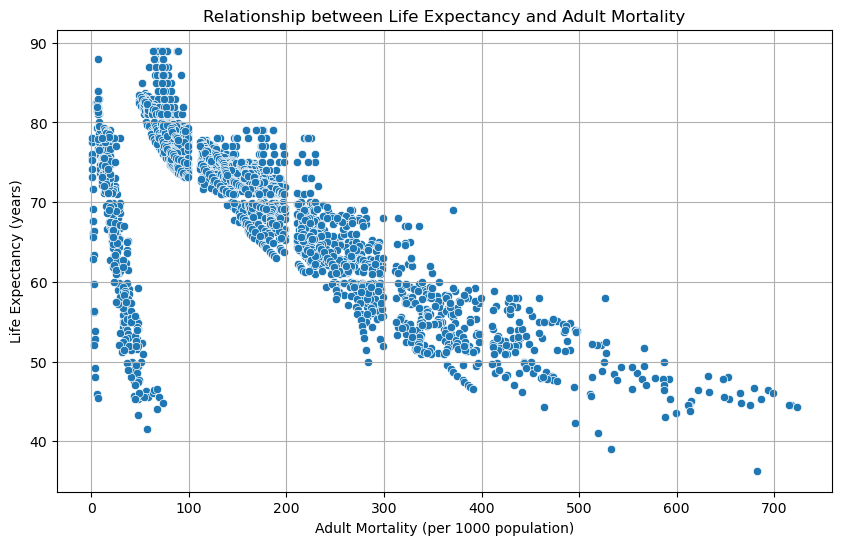

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = my_data

# Plotting the relationship between Life Expectancy and Adult Mortality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Adult Mortality', y='Life expectancy ')
plt.title('Relationship between Life Expectancy and Adult Mortality')
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()


DISTRIBUTION OF TARGET VARIABLE

In [46]:
my_datacolumns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'hdicode', 'HDI', 'GNI',
       'Life_exp_mf', 'Life_expectancy_at_birth', 'Life_expectancy_at_age_10',
       'Life_expectancy_at_age_25', 'Life_expectancy_at_age_45',
       'Life_expectancy_at_age_65', 'Life_expectancy_at_age_80'],
      dtype='object')

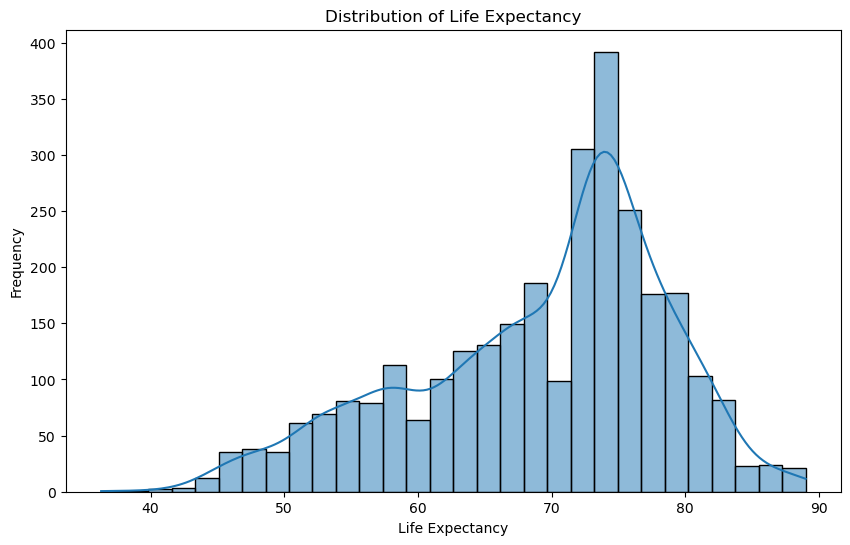

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'Life expectancy '
plt.figure(figsize=(10, 6))
sns.histplot(my_data['Life expectancy '], kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


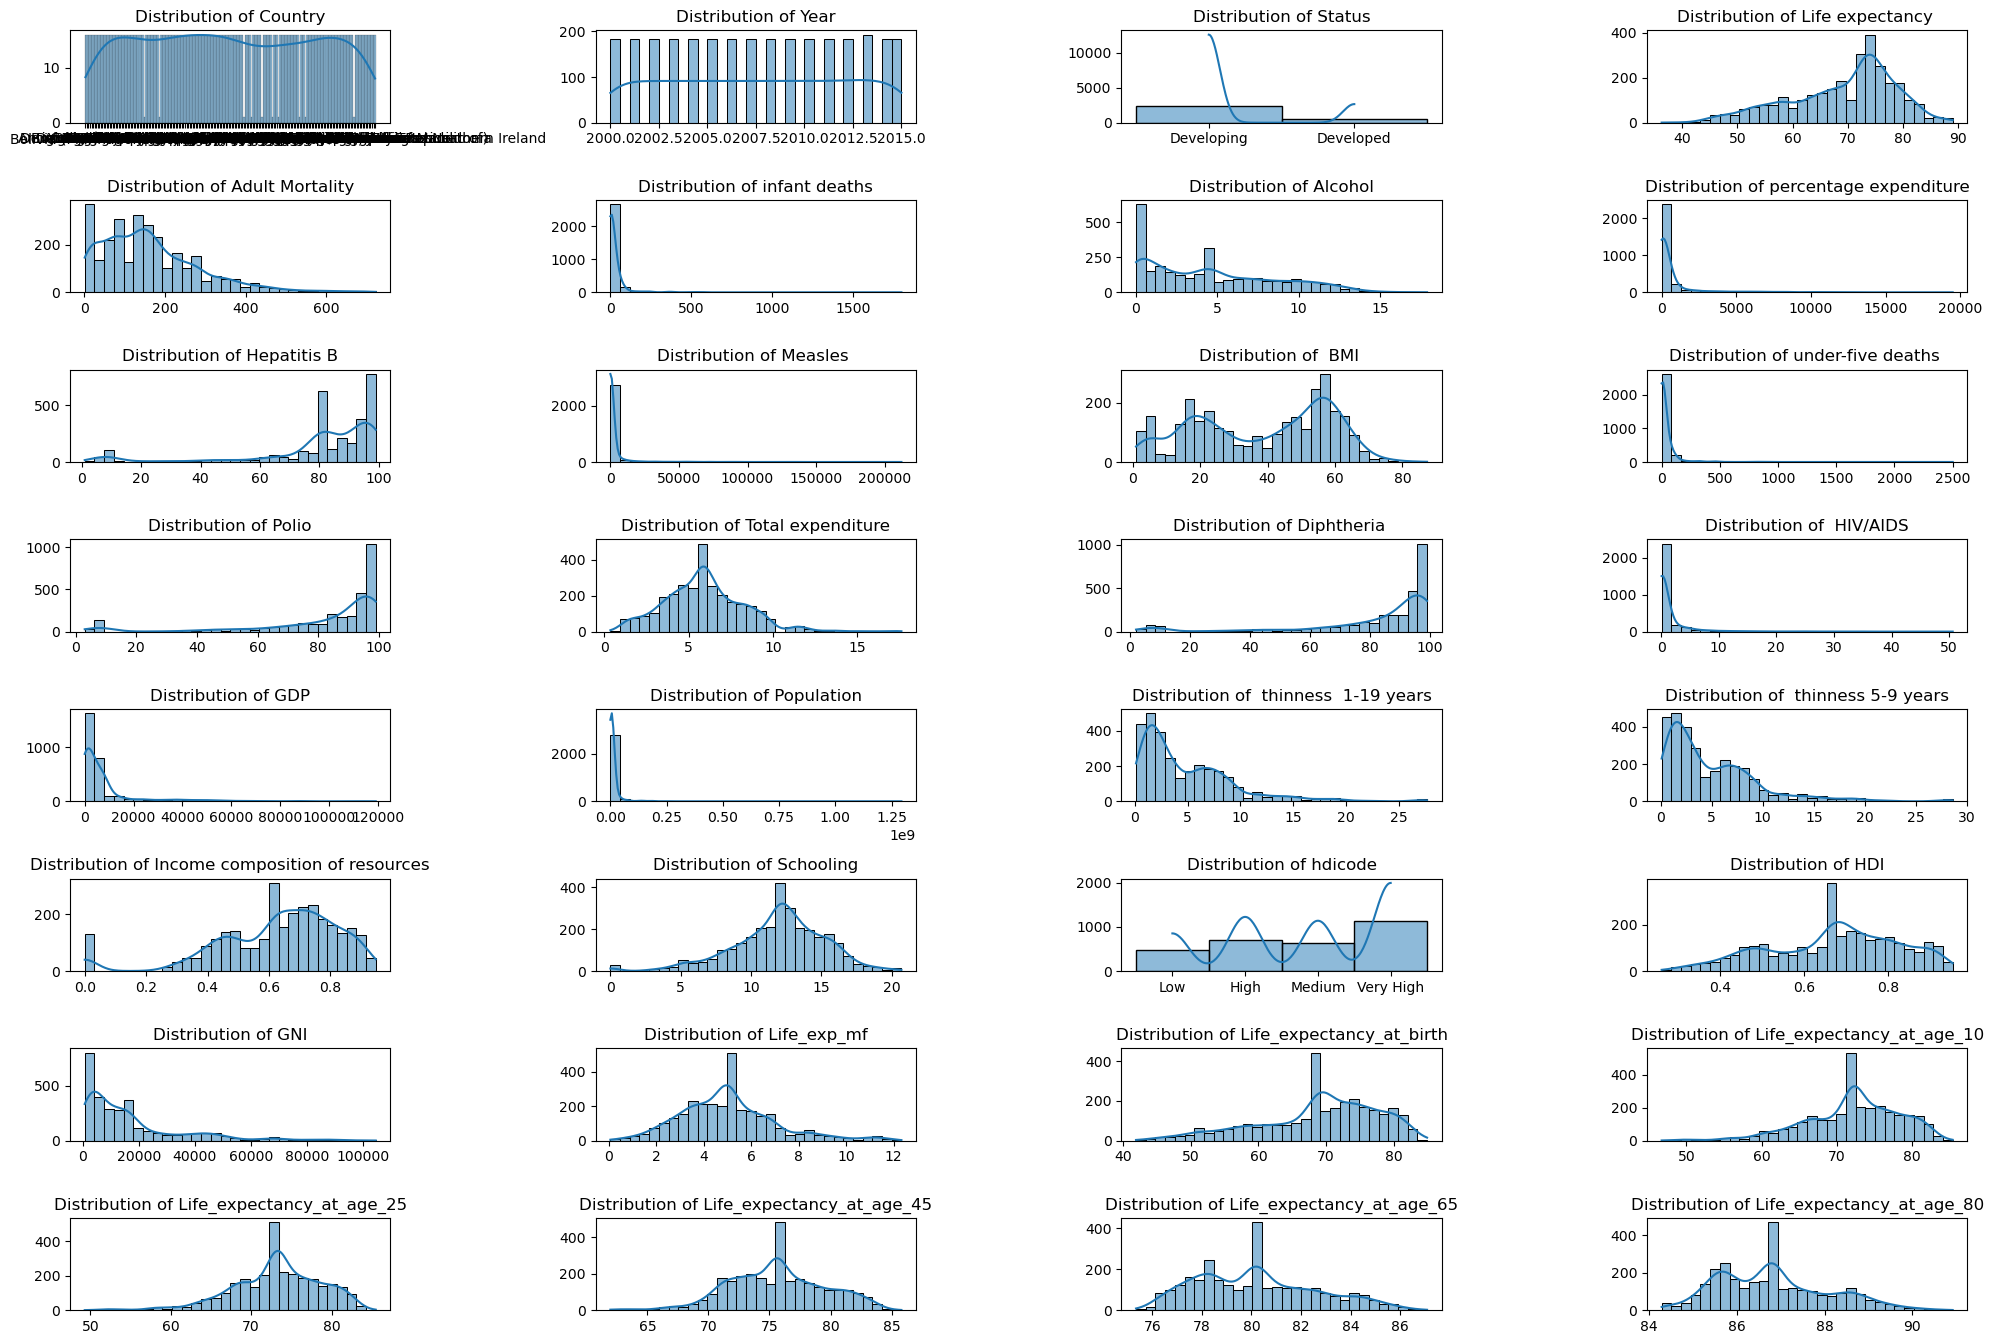

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(20, 15))

# Select a subset of columns for plotting
subset_columns = my_data.columns

# Number of variables
num_vars = len(subset_columns)

# Calculate the number of rows and columns for the subplots
num_cols = 4
num_rows = (num_vars // num_cols) + 1

# Create a subplot for each variable
for i, col in enumerate(subset_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(my_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


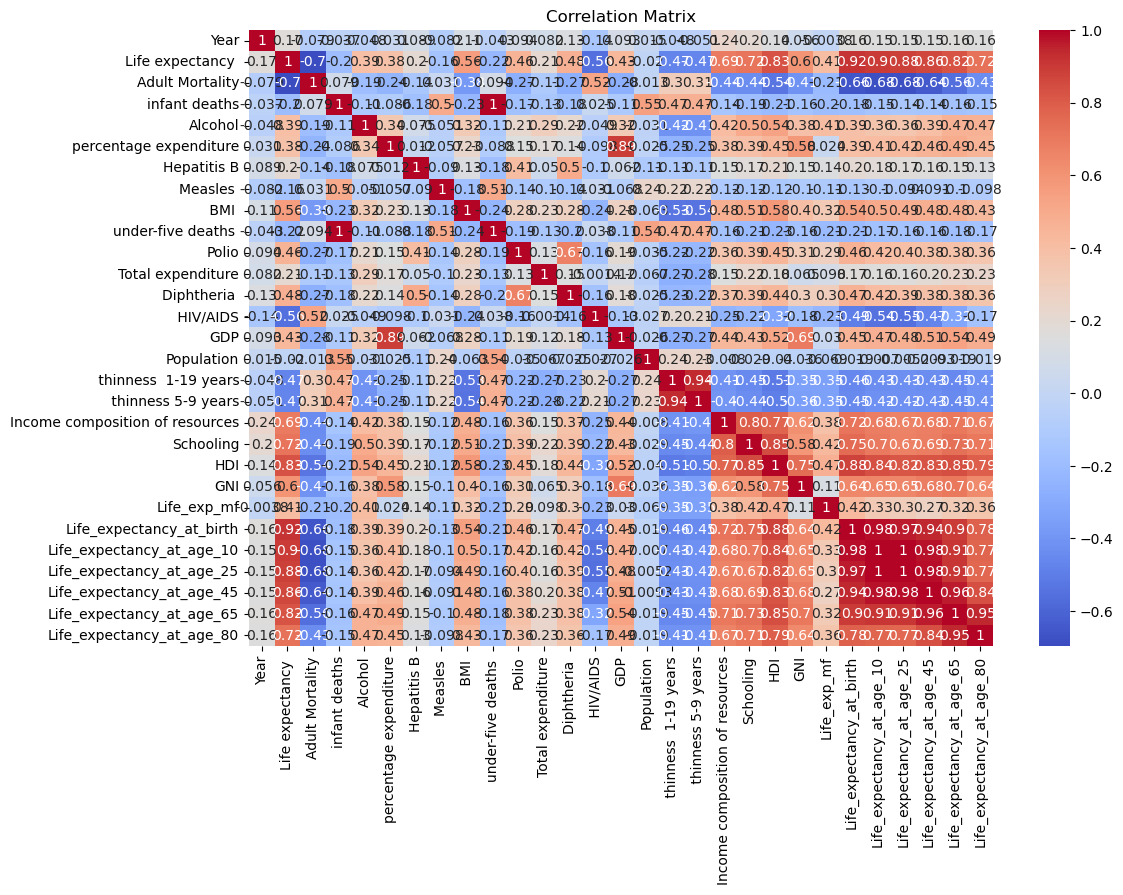

In [51]:
# Calculate the correlation matrix
correlation_matrix = my_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


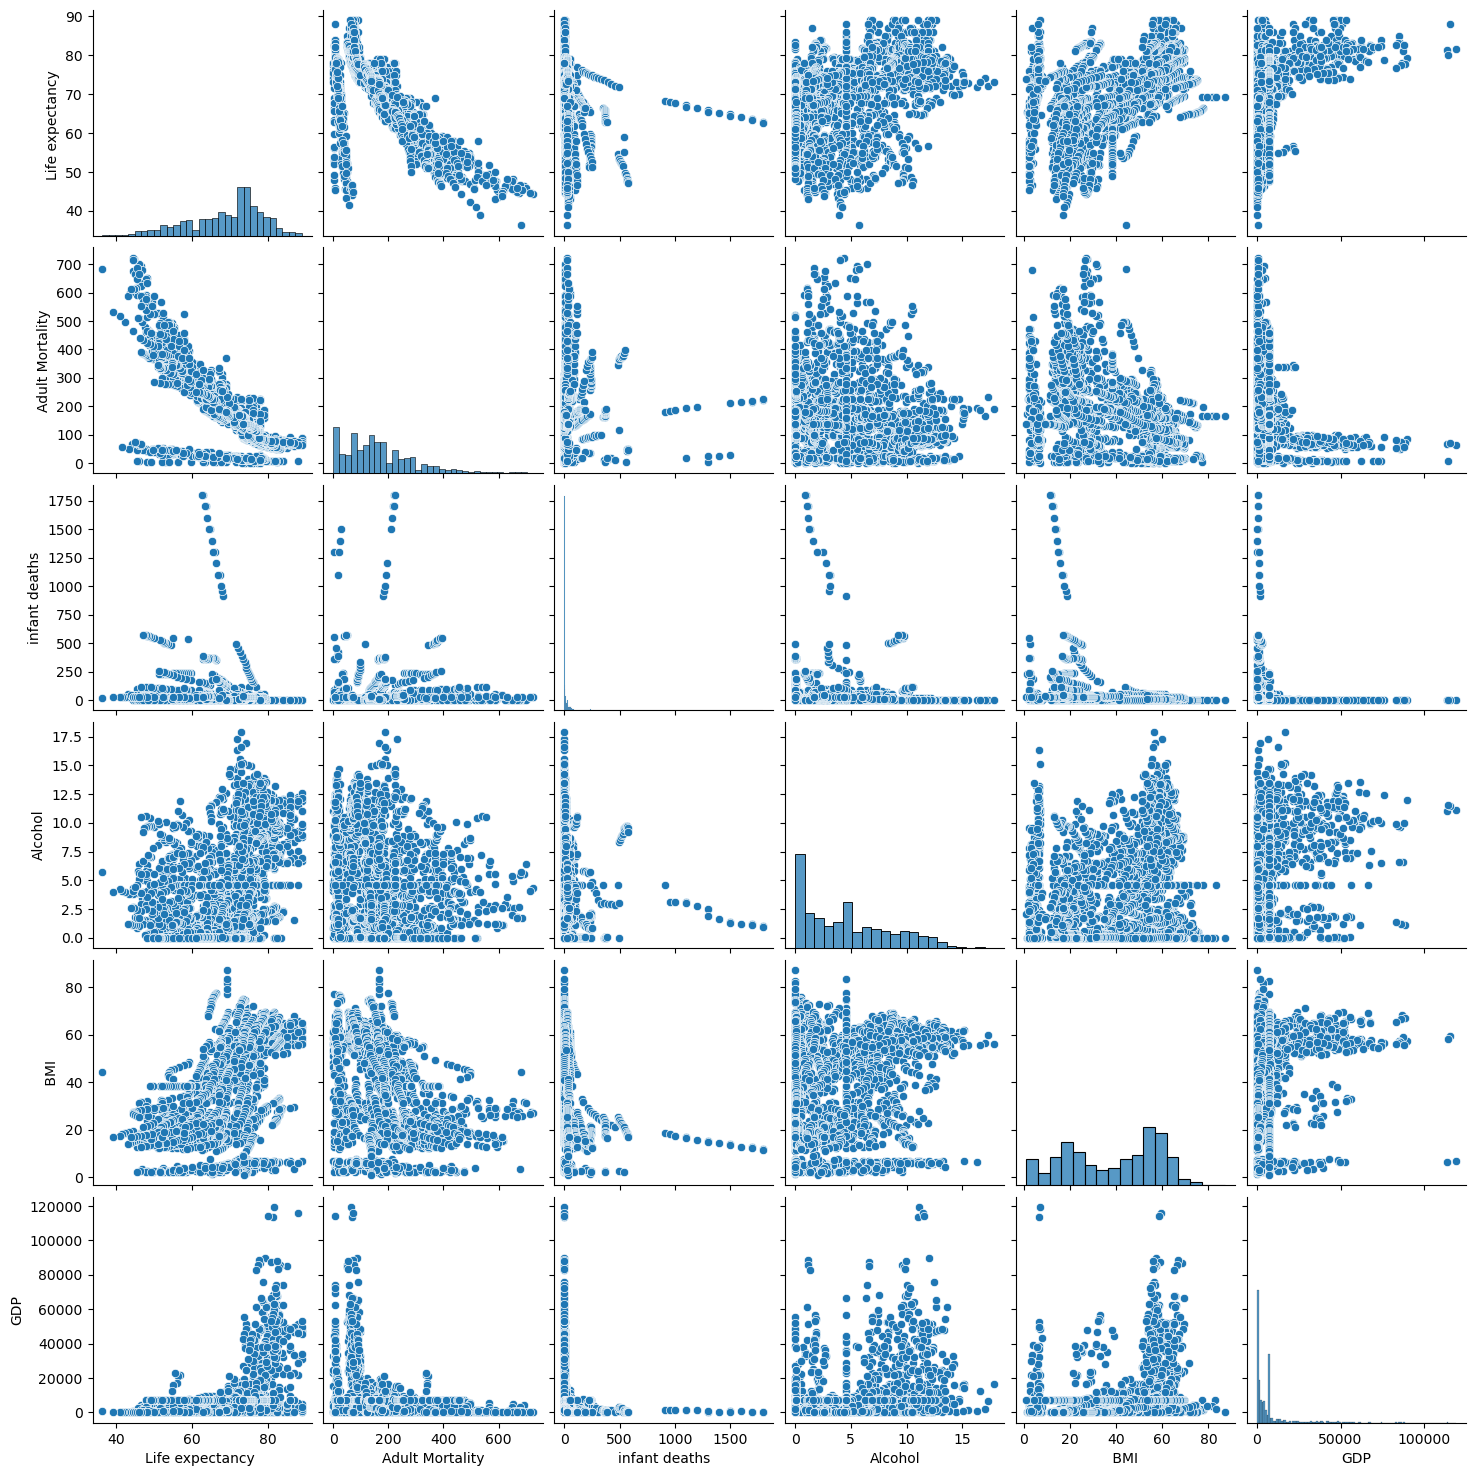

In [52]:
# Select a subset of columns for pairplot (to avoid overplotting)
subset_columns = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ', 'GDP']
sns.pairplot(my_data[subset_columns])
plt.show()


In [54]:
# Check the skewness of the target variable
print(f"Skewness of Life expectancy: {my_data['Life expectancy '].skew()}")


Skewness of Life expectancy: -0.6396932035944191


In [58]:
#Handling catagorical variables with one hot encoding 
# One-hot encode the 'Status' and 'hdicode' categorical variables
my_data = pd.get_dummies(my_data, columns=['Status', 'hdicode'], drop_first=True)

# Verify the encoding
print(my_data.head())

       Country  Year  Life expectancy   Adult Mortality  infant deaths  \
0  Afghanistan  2015          8.062258            263.0             62   
1  Afghanistan  2014          7.739509            271.0             64   
2  Afghanistan  2013          7.739509            268.0             66   
3  Afghanistan  2012          7.713624            272.0             69   
4  Afghanistan  2011          7.694154            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0     0.01               71.279624         65.0      1154   19.1  ...   
1     0.01               73.523582         62.0       492   18.6  ...   
2     0.01               73.219243         64.0       430   18.1  ...   
3     0.01               78.184215         67.0      2787   17.6  ...   
4     0.01                7.097109         68.0      3013   17.2  ...   

   Life_expectancy_at_birth  Life_expectancy_at_age_10  \
0                   62.6587                  68.091000   


In [59]:
## CHECKING FOR OUTLIERS IN ALL THE FEATURES

import numpy as np

# Function to detect outliers using IQR method
def detect_outliers(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Detect outliers in the numerical features
numerical_features = my_data.select_dtypes(include=['float64', 'int64']).columns
outliers = detect_outliers(my_data[numerical_features])

# Display the detected outliers
for feature, outlier_values in outliers.items():
    print(f"{feature}: {len(outlier_values)} outliers")

Year: 0 outliers
Life expectancy : 51 outliers
Adult Mortality: 86 outliers
infant deaths: 315 outliers
Alcohol: 3 outliers
percentage expenditure: 389 outliers
Hepatitis B: 316 outliers
Measles : 542 outliers
 BMI : 0 outliers
under-five deaths : 394 outliers
Polio: 279 outliers
Total expenditure: 51 outliers
Diphtheria : 298 outliers
 HIV/AIDS: 542 outliers
GDP: 300 outliers
Population: 194 outliers
 thinness  1-19 years: 100 outliers
 thinness 5-9 years: 99 outliers
Income composition of resources: 130 outliers
Schooling: 77 outliers
HDI: 0 outliers
GNI: 288 outliers
Life_exp_mf: 97 outliers
Life_expectancy_at_birth: 44 outliers
Life_expectancy_at_age_10: 50 outliers
Life_expectancy_at_age_25: 51 outliers
Life_expectancy_at_age_45: 20 outliers
Life_expectancy_at_age_65: 0 outliers
Life_expectancy_at_age_80: 7 outliers


In [60]:
import numpy as np

# Function to cap outliers using IQR method
def cap_outliers(data):
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Cap outliers in the numerical features
numerical_features = my_data.select_dtypes(include=['float64', 'int64']).columns
my_data[numerical_features] = cap_outliers(my_data[numerical_features])

# Verify the transformation
print(my_data[numerical_features].describe())


C:\Users\hp\AppData\Local\Temp\ipykernel_15852\2825525653.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_15852\2825525653.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])


              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720          8.301699       162.024154      13.635126   
std       4.613841          0.582161       115.483835      19.108928   
min    2000.000000          6.832368         1.000000       0.000000   
25%    2004.000000          7.949843        74.000000       0.000000   
50%    2008.000000          8.485281       144.000000       3.000000   
75%    2012.000000          8.694826       227.000000      22.000000   
max    2015.000000          9.433981       456.500000      55.000000   

           Alcohol  percentage expenditure  Hepatitis B     Measles   \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.602295              284.045797    84.638203   233.745660   
std       3.914463              389.455566    12.803598   353.612509   
min       0.010000                0.000000    58.351153     0.0

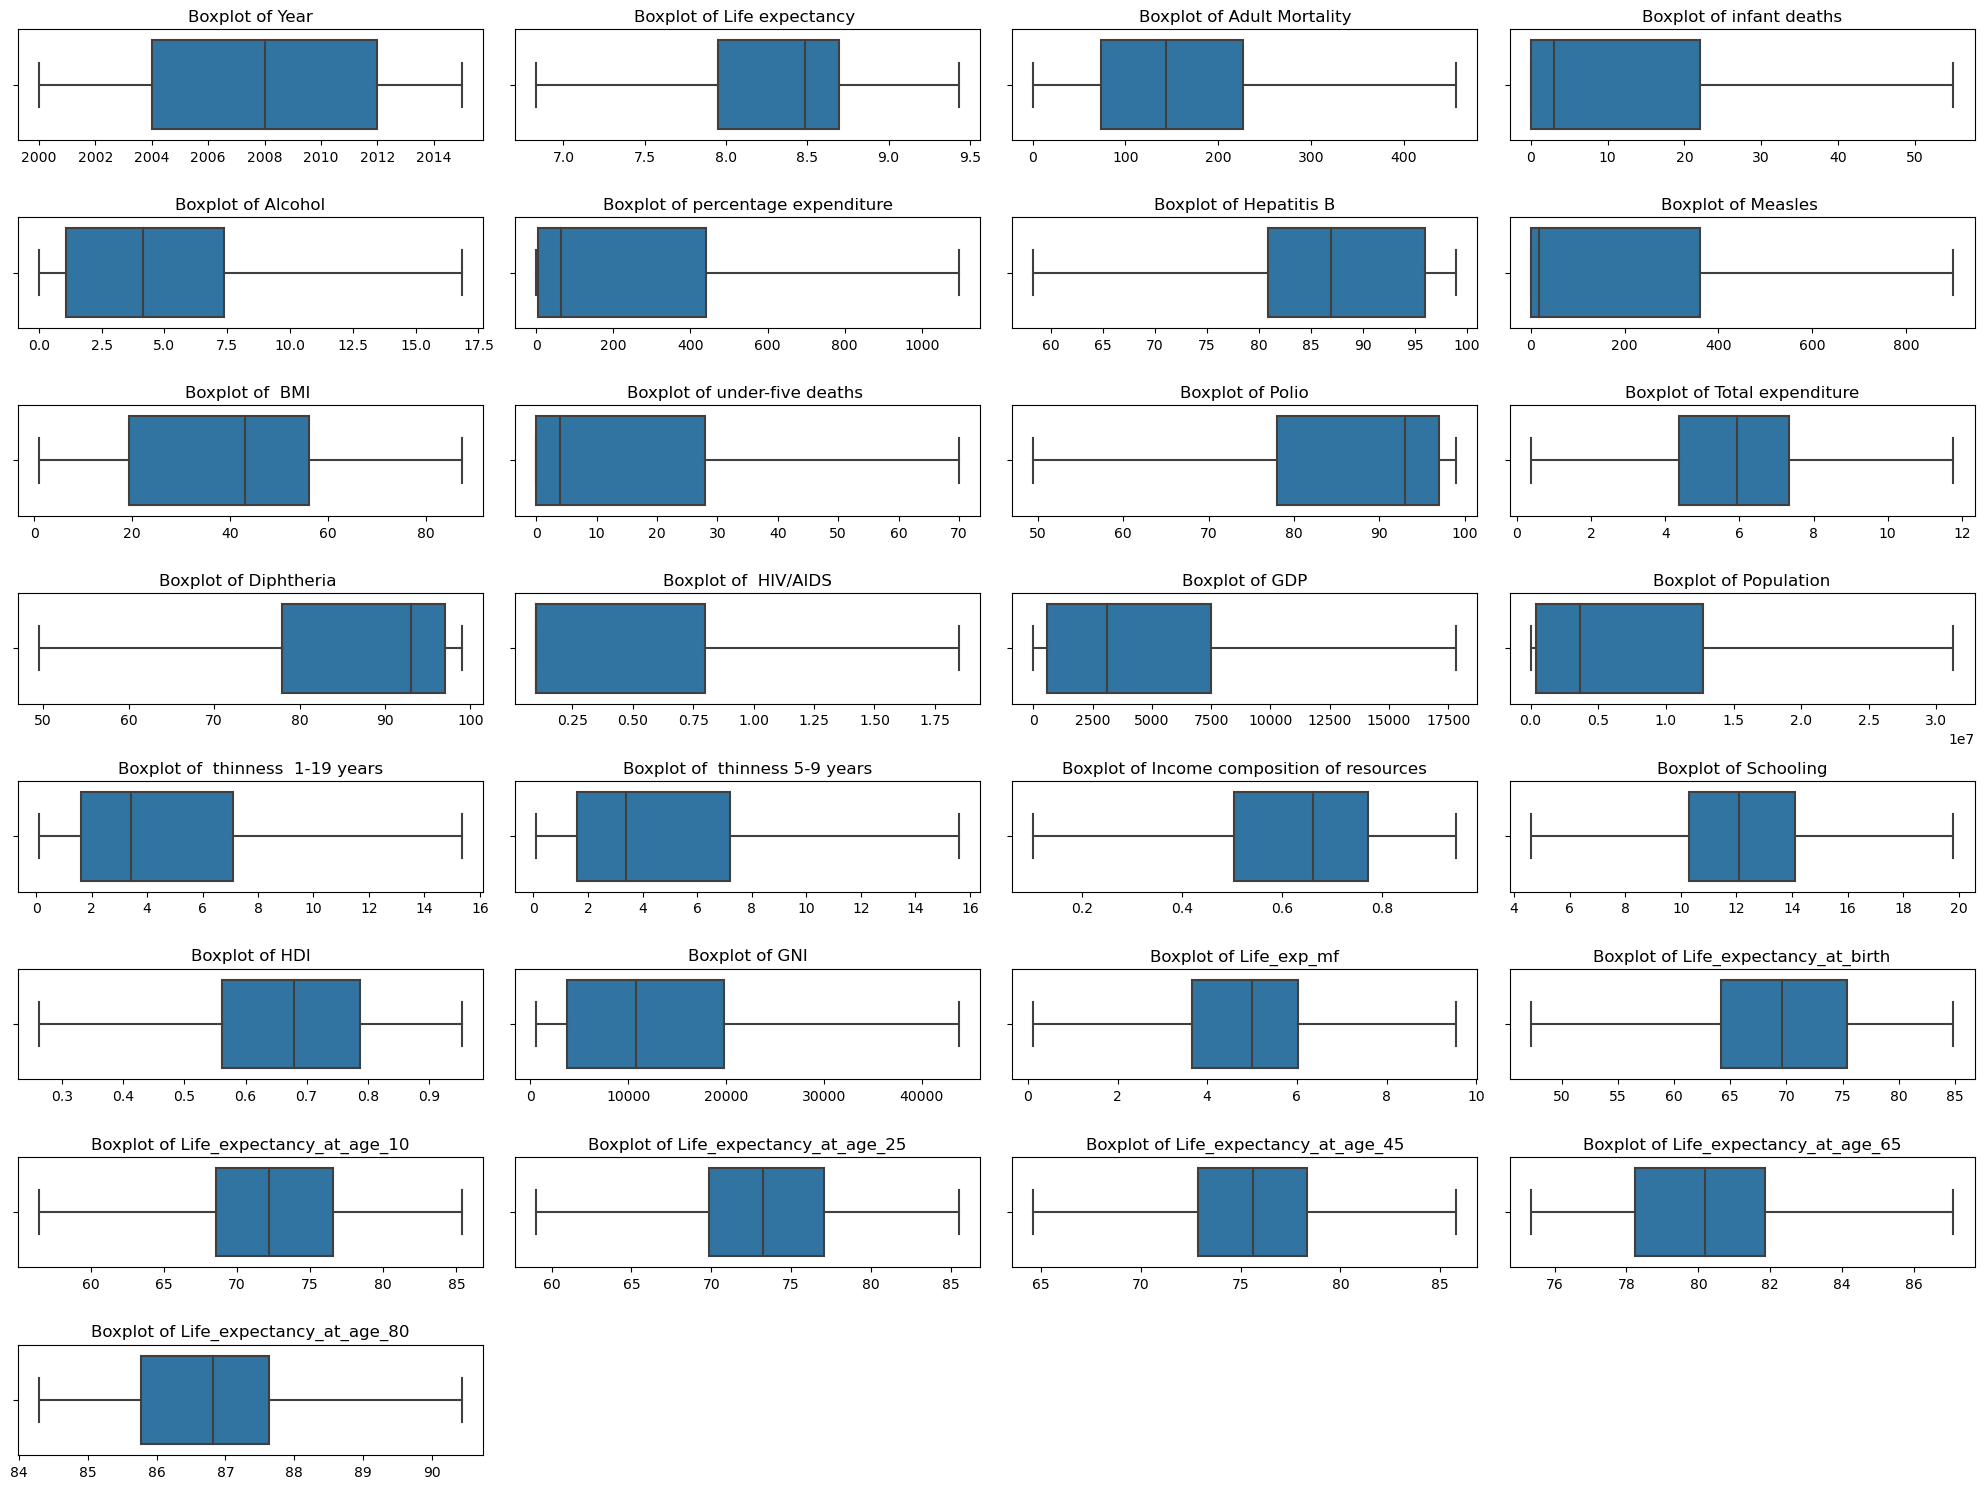

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the boxplots to verify outlier handling
plt.figure(figsize=(20, 15))
num_cols = 4
num_rows = (len(numerical_features) // num_cols) + 1

for i, col in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=my_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


# FEATURE SELECTION

In [62]:
#Based on eda results and encoding we selected following features.
selected_features = [
    'Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ', 'GDP', 
    'Income composition of resources', 'Schooling', 'HDI', 'GNI', 
    'Status_Developing', 'hdicode_Low', 'hdicode_Medium', 'hdicode_Very High'
]


In [63]:
# Splitting the data into train and test
# Prepare the data for modeling
X = my_data[selected_features]
y = my_data['Life expectancy ']

# Display the first few rows of the selected features
print(X.head())
print(y.head())

   Adult Mortality  infant deaths  Alcohol   BMI          GDP  \
0            263.0           55.0     0.01   19.1  584.259210   
1            271.0           55.0     0.01   18.6  612.696514   
2            268.0           55.0     0.01   18.1  631.744976   
3            272.0           55.0     0.01   17.6  669.959000   
4            275.0           55.0     0.01   17.2   63.537231   

   Income composition of resources  Schooling    HDI          GNI  \
0                            0.479       10.1  0.478  2101.589319   
1                            0.476       10.0  0.479  2178.507021   
2                            0.470        9.9  0.474  2193.553936   
3                            0.463        9.8  0.466  2125.862821   
4                            0.454        9.5  0.456  1999.653042   

   Status_Developing  hdicode_Low  hdicode_Medium  hdicode_Very High  
0                  1            1               0                  0  
1                  1            1               0   

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2350, 13)
X_test shape: (588, 13)
y_train shape: (2350,)
y_test shape: (588,)


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"Linear Regression Model Summary")
print(f"Mean Squared Error: {mse_linear}")
print(f"Mean Absolute Error: {mae_linear}")
print(f"R^2 Score: {r2_linear}")


Linear Regression Model Summary
Mean Squared Error: 0.06405177653148056
Mean Absolute Error: 0.1845775602058859
R^2 Score: 0.8035570934559018


In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("\nDecision Tree Regressor Model Summary:")
print(f"Mean Squared Error: {mse_tree}")
print(f"Mean Absolute Error: {mae_tree}")
print(f"R^2 Score: {r2_tree}")



Decision Tree Regressor Model Summary:
Mean Squared Error: 0.02302496670971969
Mean Absolute Error: 0.09143880875021822
R^2 Score: 0.9293838262032373


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the random forest regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)

print("\nRandom Forest Regressor Model Summary:")
print(f"Mean Squared Error: {mse_forest}")
print(f"Mean Absolute Error: {mae_forest}")
print(f"R^2 Score: {r2_forest}")



Random Forest Regressor Model Summary:
Mean Squared Error: 0.011663154325283328
Mean Absolute Error: 0.06768658157237752
R^2 Score: 0.9642298143907849


In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the gradient boosting regressor
gboost_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gboost = gboost_model.predict(X_test)

# Evaluate the model
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
r2_gboost = r2_score(y_test, y_pred_gboost)
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)

print("\nGradient Boosting Regressor Model Summary:")
print(f"Mean Squared Error: {mse_gboost}")
print(f"Mean Absolute Error: {mae_gboost}")
print(f"R^2 Score: {r2_gboost}")



Gradient Boosting Regressor Model Summary:
Mean Squared Error: 0.020837381742182557
Mean Absolute Error: 0.10433140025891079
R^2 Score: 0.9360930163710379


In [77]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the support vector regressor
svr_model = SVR()

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("\nSupport Vector Regressor Model Summary:")
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R^2 Score: {r2_svr}")



Support Vector Regressor Model Summary:
Mean Squared Error: 0.11683224544410158
Mean Absolute Error: 0.23169262315430014
R^2 Score: 0.6416826024828093


In [82]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("\nXGBoost Regressor Model Summary:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"R^2 Score: {r2_xgb}")



XGBoost Regressor Model Summary:
Mean Squared Error: 0.011949586408115238
Mean Absolute Error: 0.07109817131067843
R^2 Score: 0.9633513445976586


# Hyperparameter tuning GridSearchCV to best performing models

In [84]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest Regressor:")
print(best_params_rf)
print(f"Best CV Score for Random Forest Regressor: {best_score_rf}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest Regressor:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score for Random Forest Regressor: 0.9503223997791924


In [86]:
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Parameters for XGBoost Regressor:")
print(best_params_xgb)
print(f"Best CV Score for XGBoost Regressor: {best_score_xgb}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for XGBoost Regressor:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best CV Score for XGBoost Regressor: 0.9520736905065142


In [87]:
##Train and evaluate the Randomforest regressor with best parameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Random Forest Regressor with best parameters
best_rf = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("Best Random Forest Regressor Model Summary:")
print(f"Mean Squared Error: {mse_best_rf}")
print(f"Mean Absolute Error: {mae_best_rf}")
print(f"R^2 Score: {r2_best_rf}")


Best Random Forest Regressor Model Summary:
Mean Squared Error: 0.011598595544737756
Mean Absolute Error: 0.06767082190067808
R^2 Score: 0.9644278122478324


In [90]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the XGBoost Regressor with best parameters
best_xgb = xgb.XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.8,
    objective='reg:squarederror',
    random_state=42
)

# Train the model on the training data
best_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

print("\nBest XGBoost Regressor Model Summary:")
print(f"Mean Squared Error: {mse_best_xgb}")
print(f"Mean Absolute Error: {mae_best_xgb}")
print(f"R^2 Score: {r2_best_xgb}")



Best XGBoost Regressor Model Summary:
Mean Squared Error: 0.01124682442274931
Mean Absolute Error: 0.06775329508572134
R^2 Score: 0.9655066729037538


# Feature Importance analysis

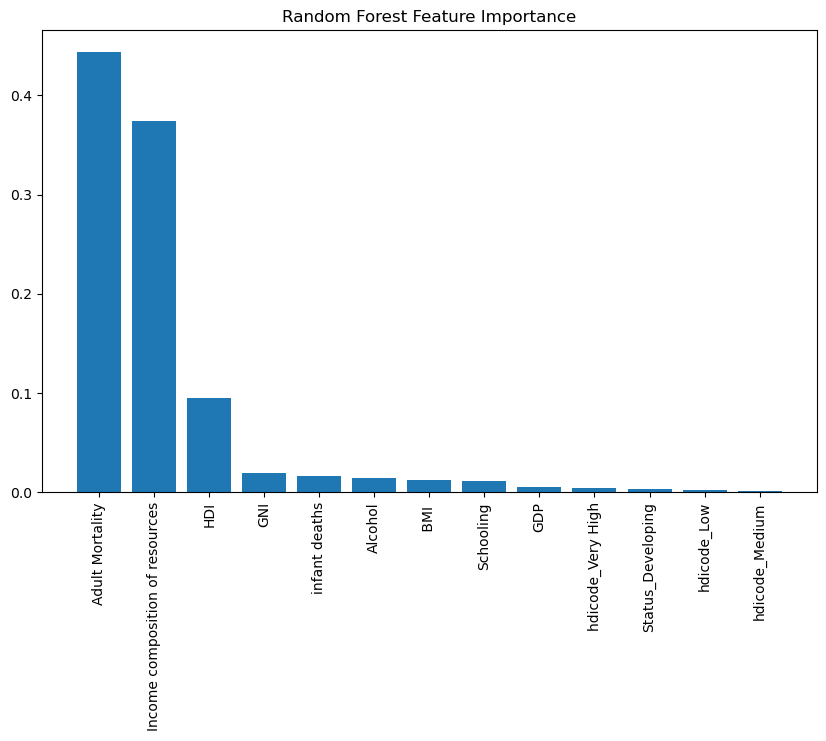

In [89]:
#Feature Importance for Random forest
import matplotlib.pyplot as plt

# Get feature importances
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
names_rf = [X.columns[i] for i in indices_rf]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(X.shape[1]), importances_rf[indices_rf])
plt.xticks(range(X.shape[1]), names_rf, rotation=90)
plt.show()


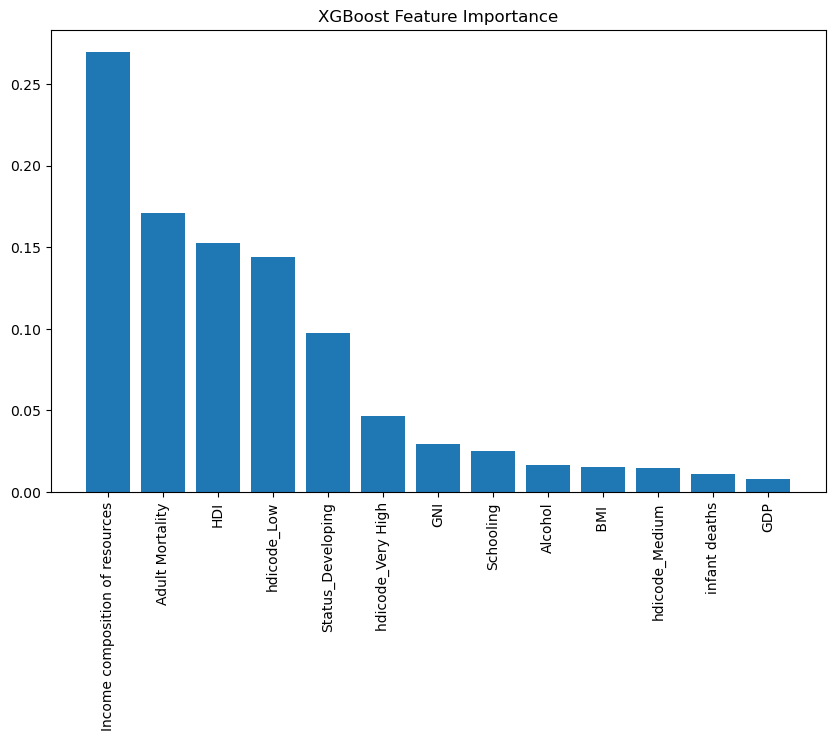

In [91]:
# Get feature importances
importances_xgb = best_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
names_xgb = [X.columns[i] for i in indices_xgb]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(X.shape[1]), importances_xgb[indices_xgb])
plt.xticks(range(X.shape[1]), names_xgb, rotation=90)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


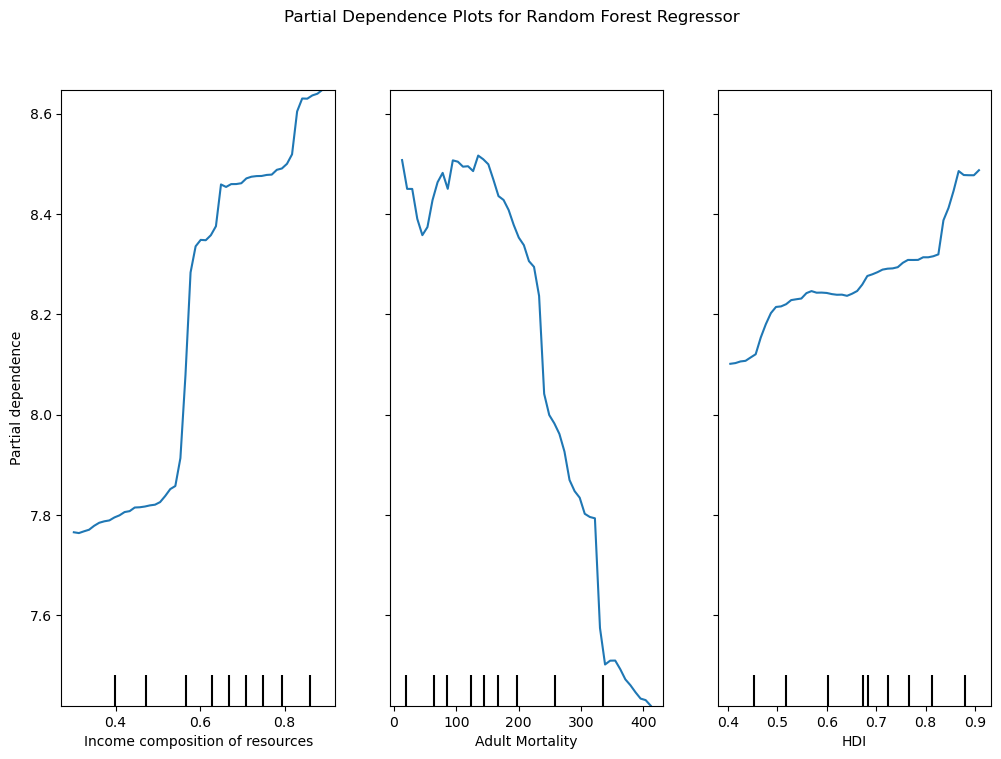

In [92]:
from sklearn.inspection import plot_partial_dependence

# Define the top features to plot
top_features_rf = ['Income composition of resources', 'Adult Mortality', 'HDI']

# Create PDP for the top features
fig, ax = plt.subplots(figsize=(12, 8))
plot_partial_dependence(best_rf, X_train, features=top_features_rf, grid_resolution=50, ax=ax)
plt.suptitle('Partial Dependence Plots for Random Forest Regressor')
plt.show()


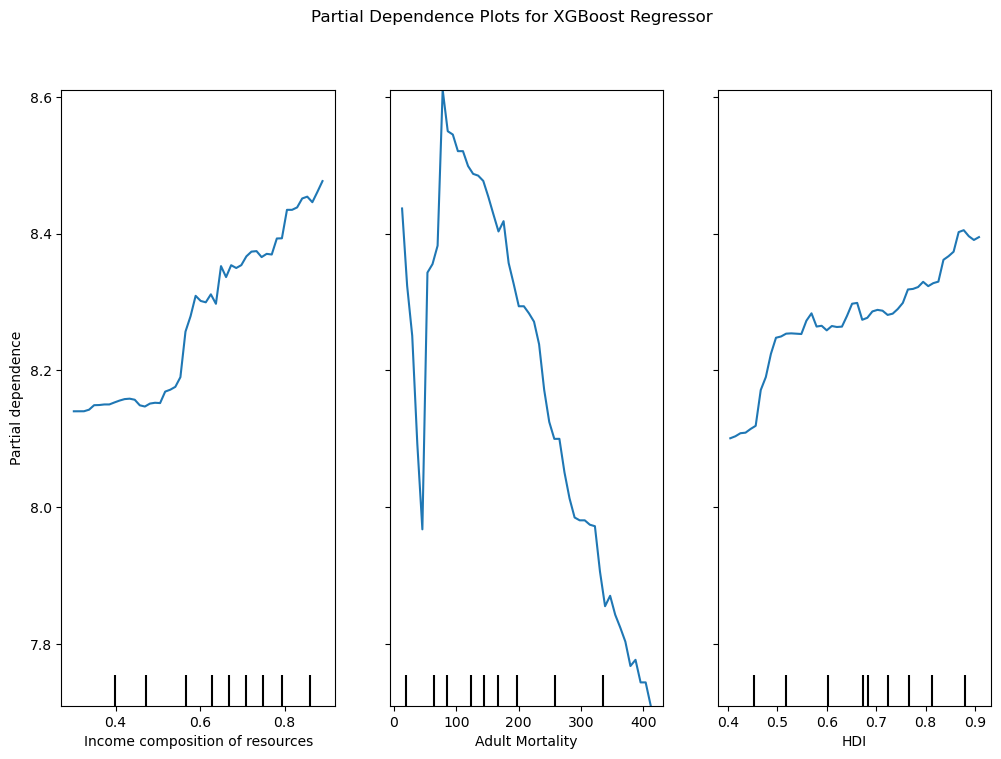

In [93]:
from sklearn.inspection import plot_partial_dependence

# Define the top features to plot
top_features_xgb = ['Income composition of resources', 'Adult Mortality', 'HDI']

# Create PDP for the top features
fig, ax = plt.subplots(figsize=(12, 8))
plot_partial_dependence(best_xgb, X_train, features=top_features_xgb, grid_resolution=50, ax=ax)
plt.suptitle('Partial Dependence Plots for XGBoost Regressor')
plt.show()
